<a href="https://colab.research.google.com/github/SESCDS/sescds/blob/master/Lesson7/Lesson7_PUBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBG Finish Placement Prediction (Kernels Only)
https://www.kaggle.com/c/pubg-finish-placement-prediction

![alt text](https://www.gamespark.jp/imgs/p/PseAHU_gq3GEwRLM5htwMwoLvAaDYAQDAgEA/258064.jpg)

## Скачайте kaggle.json и загрузите его в коллаб запустив ячейки ниже.
![alt text](https://github.com/SESCDS/sescds/blob/master/Lesson7/data/img3.png?raw=true)

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c pubg-finish-placement-prediction

 30% 5.00M/16.9M [00:00<00:00, 19.5MB/s]
100% 16.9M/16.9M [00:00<00:00, 52.8MB/s]
 91% 89.0M/98.3M [00:02<00:00, 30.0MB/s]
100% 98.3M/98.3M [00:02<00:00, 44.2MB/s]
 95% 228M/239M [00:03<00:00, 91.9MB/s]
100% 239M/239M [00:03<00:00, 68.4MB/s]


In [0]:
import pandas as pd
pd.options.display.max_columns = 999

Если всё выше вы сделали правильно, то успешно считаете датасет и увидете первые его строки командой **head()**.

In [8]:
%%time
train = pd.read_csv('train_V2.csv.zip', compression='zip')

CPU times: user 21.2 s, sys: 2.55 s, total: 23.7 s
Wall time: 23.7 s


In [0]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


Описание колонок:

- **groupId** - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **matchId** - Integer ID to identify match. There are no matches that are in both the training and testing set.
- **assists** - Number of enemy players this player damaged that were killed by teammates.
- **boosts** - Number of boost items used.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **DBNOs** - Number of enemy players knocked.
- **headshotKills** - Number of enemy players killed with headshots.
- **heals** - Number of healing items used.
- **killPlace** - Ranking in match of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- **kills** - Number of enemy players killed.
- **killStreaks** - Max number of enemy players killed in a short amount of time.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **numGroups** - Number of groups we have data for in the match.
- **revives** - Number of times this player revived teammates.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **teamKills** - Number of times this player killed a teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot measured in meters.
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

<img src="https://i.ytimg.com/vi/rnAeX795Jn0/maxresdefault.jpg" alt="The Killers" style="width: 700px;"/>

### Задание 1. Убийства
Колонка *kills* содержит информацию о количестве убитых врагов. Найдите:

а) Сколько игроков сделали одно убийство за игру?

б) Сколько в среднем за партию игрок убивает врагов. Вам пригодится `.mean()`

в) Квантиль 90%, т.е. сколько максиимум убийств за партию совершает 90% игроков. Вам понадобится метод `.quantile(0.90)`

г) Максимальное количество убийств, совершённых игроком в партии. Смотрите `.max()`

In [0]:
#Ваш код тут

Давайте нарисуем график количества фрагов.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

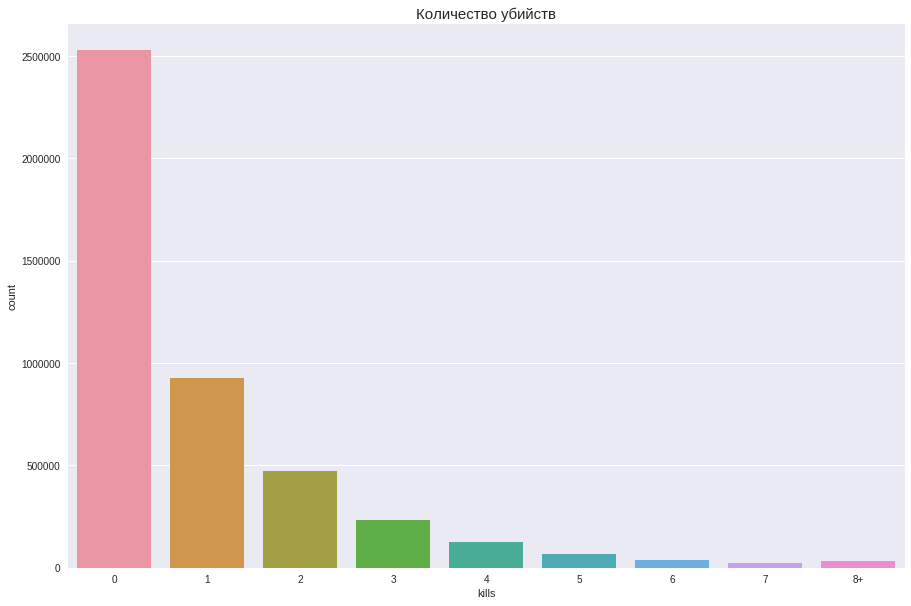

In [0]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Количество убийств",fontsize=15)
plt.show();

Видно, что большинство игроков не делают ни одного убийства за игру.

### Задание 2.
Отобразите на графике урон, который нанесли игроки, которые не сделали ни одного фрага. Используйте `sns.distplot()`

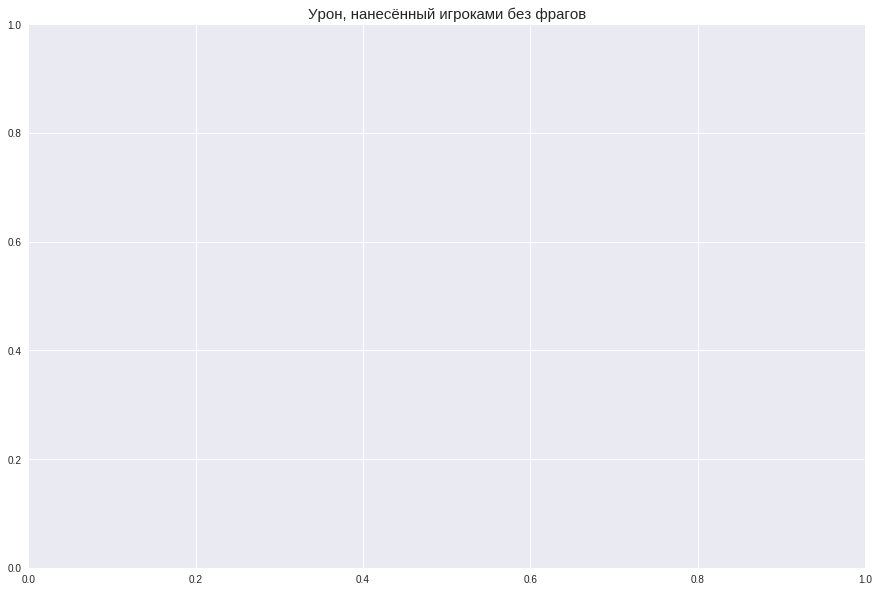

In [0]:
#Ваш код тут
plt.figure(figsize=(15,10))
plt.title("Урон, нанесённый игроками без фрагов",fontsize=15)
plt.show()

### Задание 3.
а) Сколько игроков выиграло из тех, кто не сделал ни единого фрага? Какой это процент от всех игроков, которые не сделали фрагов?

б) Сколько игроков выиграло из тех, кто не нанёс урона? Какой это процент от всех игроков, которые не нанесли урон?

In [0]:
#Ваш код тут

### Задание 4. Пройденное пешком расстояние
Постройте график показывающий, сколько людей какое расстряние прошли пешком. Используйте `sns.distplot()`.

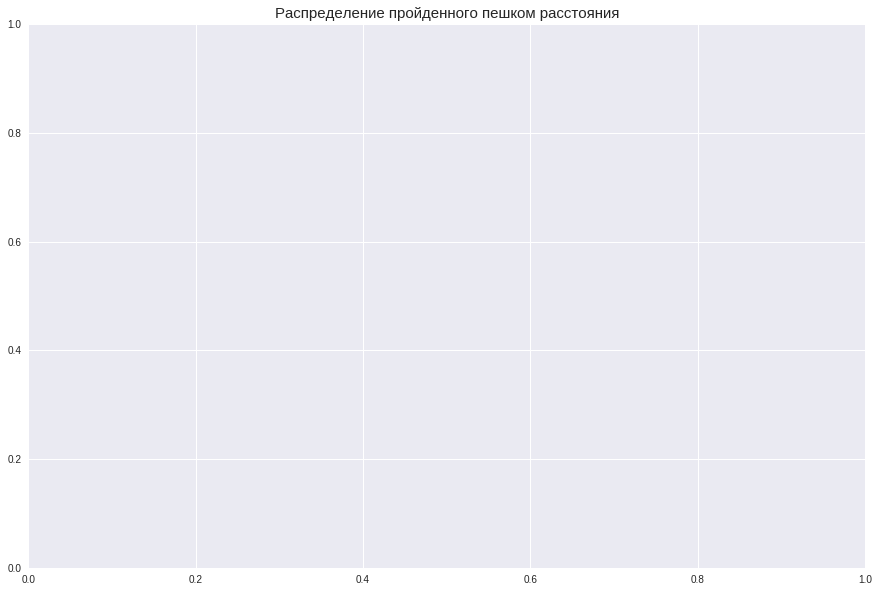

In [0]:
#Ваш код тут
plt.figure(figsize=(15,10))
plt.title("Распределение пройденного пешком расстояния",fontsize=15)
plt.show()

![alt text](https://playbattlegrounds.su/uploads/images/00/00/03/2018/02/24/d058bd.png)

### Задание 5. Соло, Дуэт, Отряд
В игре 3 режима. Вы можете играть в одиночку - **Соло**, можете вдвоём с другом зайти в игру - **Дуэт**, а можете заволиться в игру толпой до 4х человек - **Отряд**.

Соответственно, если режим Дуэт, то команд (**numGroups**) не может быть больше 50, а если Отряд, то не может быть больше 25.

Посчитайте количество и процент от всех

а) соло партий

б) дуэт партий

в) отряд партий


In [0]:
#Ваш код тут

In [0]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442529 (9.95%) squad games.


## График зависимости позиции в рейтинге от количества убийств

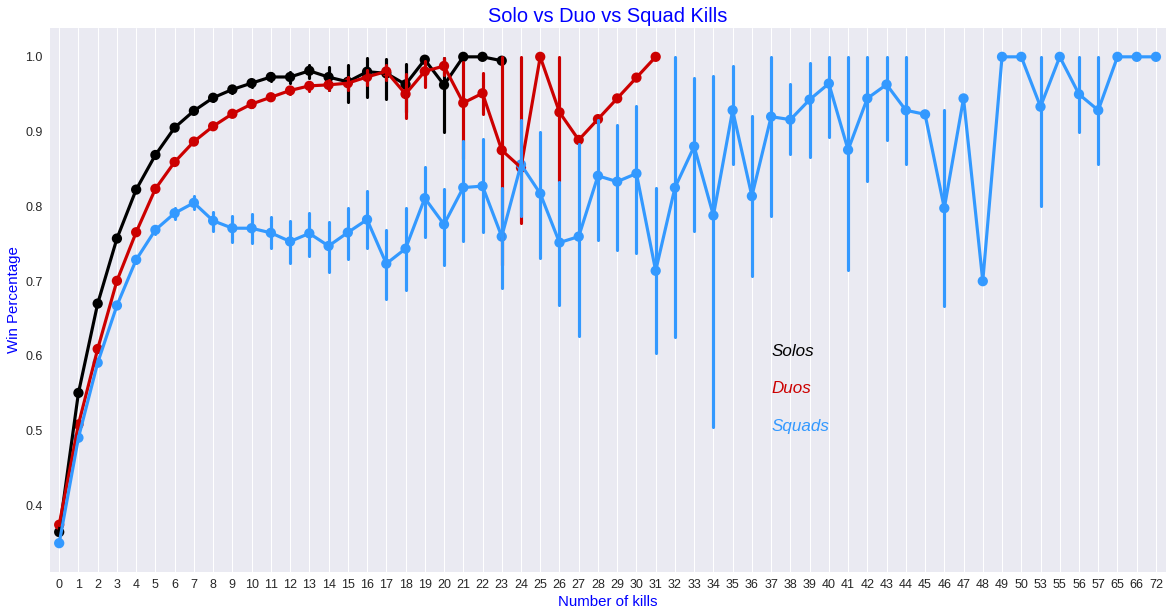

In [0]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

# [Корреляция Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F#%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8)

Статистическая взаимосвязь двух или более случайных величин. При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.

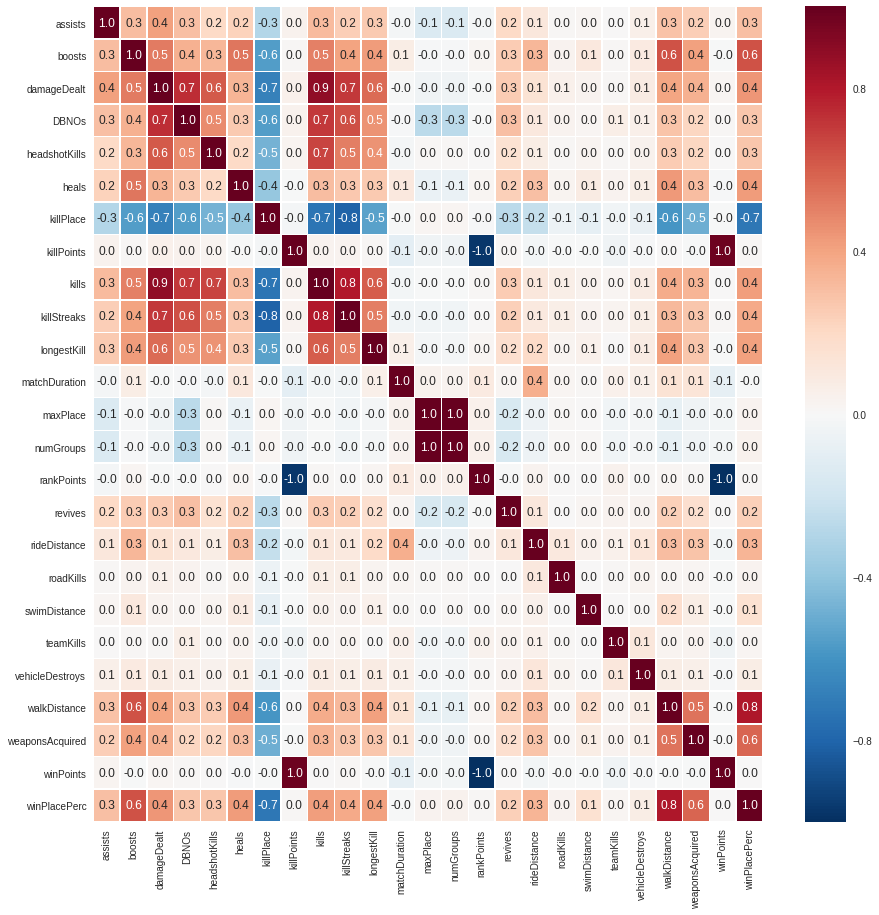

In [0]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### Посмотрим на топ-5 коррелирующих с таргетом признаков

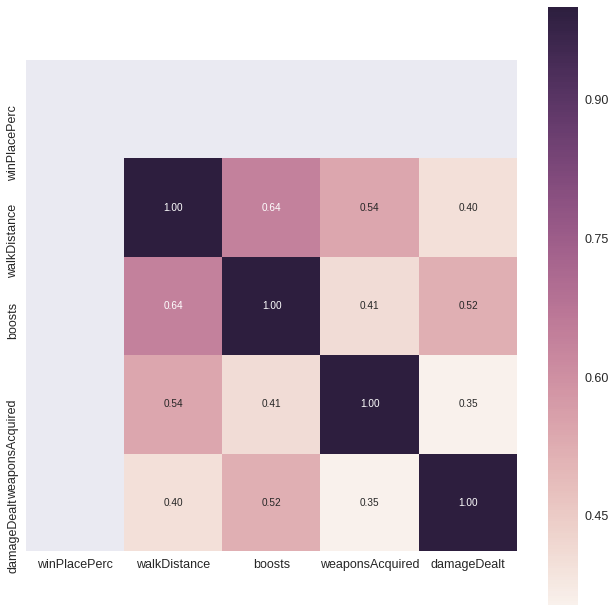

In [0]:
import numpy as np

k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
# sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# XGBoost

Пустые поля в датасете очень мешают методам машинного обучения работать с данными. Можно с ними бороться так:

In [0]:
train.dropna(inplace = True)

Очень важно, при решении соревнования и вообще любой задачи машинного обучения, выстроить правильную валидацию.

Давайте, для начала, заведём хоть какую-то :)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('winPlacePerc', axis=1),
                                                    train['winPlacePerc'],
                                                    test_size=0.2,
                                                    random_state=42)

Давайте ещё раз взгялнем на данные

In [11]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [0]:
cat_columns = ["Id", "groupId", "matchId", "matchType"]

X_train.drop(cat_columns, axis=1, inplace=True)
X_test.drop(cat_columns, axis=1, inplace=True)

In [27]:
!yes | pip3 uninstall xgboost

Skipping xgboost as it is not installed.


In [28]:
!yes | pip uninstall xgboost

Skipping xgboost as it is not installed.


### После удаления xgboost сделайте **Restart Runtime** 
если всё пошло хорошо, ниже вы получите:

`ModuleNotFoundError: No module named 'xgboost'`

In [1]:
import xgboost

ModuleNotFoundError: ignored

In [2]:
!cd xgboost_dir/python-package && pip3 install .

Processing /content/xgboost_dir/python-package
  Running setup.py bdist_wheel for xgboost ... - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/9d/87/56/d507594bf82813fc5056e282c9e70c03f21f2507425772c4e3
Successfully built xgboost


In [14]:
!wget https://github.com/SESCDS/sescds/raw/master/Lesson7/data/xgboost.zip
!unzip xgboost.zip
!mv xgboost xgboost_dir
!cd xgboost_dir/python-package && pip3 install .

--2018-11-21 01:25:36--  https://github.com/SESCDS/sescds/raw/master/Lesson7/data/xgboost.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SESCDS/sescds/master/Lesson7/data/xgboost.zip [following]
--2018-11-21 01:25:36--  https://raw.githubusercontent.com/SESCDS/sescds/master/Lesson7/data/xgboost.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76410380 (73M) [application/zip]
Saving to: ‘xgboost.zip’

xgboost.zip         100%[===================>]  72.87M   142MB/s    in 0.5s    

2018-11-21 01:25:40 (142 MB/s) - ‘xgboost.zip’ saved [76410380/76410380]

Archive:  xgboost.zi

In [0]:
import xgboost

In [0]:
model = xgboost.XGBRegressor(max_depth=17, gamma=0.3, learning_rate= 0.1, random_state=22, n_jobs=10)

In [0]:
model = xgboost.XGBRegressor(n_estimators=10, max_depth=5, gamma=0.3, learning_rate= 0.3, 
                             random_state=22, tree_method='gpu_hist')

In [13]:
%%time
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=True)

[0]	validation_0-rmse:0.232878	validation_1-rmse:0.232719
[1]	validation_0-rmse:0.18373	validation_1-rmse:0.183579
[2]	validation_0-rmse:0.152552	validation_1-rmse:0.152425
[3]	validation_0-rmse:0.132037	validation_1-rmse:0.131924
[4]	validation_0-rmse:0.118952	validation_1-rmse:0.118848
[5]	validation_0-rmse:0.11179	validation_1-rmse:0.111674
[6]	validation_0-rmse:0.106442	validation_1-rmse:0.106335
[7]	validation_0-rmse:0.103081	validation_1-rmse:0.103001
[8]	validation_0-rmse:0.100676	validation_1-rmse:0.100604
[9]	validation_0-rmse:0.099144	validation_1-rmse:0.099087
CPU times: user 10.4 s, sys: 4.08 s, total: 14.5 s
Wall time: 14.5 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, importance_type='gain',
       learning_rate=0.3, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, tree_method='gpu_hist')

In [0]:
model = xgboost.XGBRegressor(n_estimators=10, max_depth=5, gamma=0.3, learning_rate= 0.3, 
                             random_state=22)

In [0]:
%%time
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=True)

[0]	validation_0-rmse:0.232876	validation_1-rmse:0.232716
[1]	validation_0-rmse:0.18402	validation_1-rmse:0.183883
[2]	validation_0-rmse:0.15255	validation_1-rmse:0.152427
[3]	validation_0-rmse:0.133108	validation_1-rmse:0.132983
[4]	validation_0-rmse:0.121121	validation_1-rmse:0.120993
[5]	validation_0-rmse:0.112689	validation_1-rmse:0.11255
[6]	validation_0-rmse:0.108481	validation_1-rmse:0.108356
[7]	validation_0-rmse:0.104624	validation_1-rmse:0.10451
[8]	validation_0-rmse:0.101222	validation_1-rmse:0.10114
[9]	validation_0-rmse:0.099142	validation_1-rmse:0.099077
CPU times: user 1min 36s, sys: 1.21 s, total: 1min 37s
Wall time: 1min 37s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, importance_type='gain',
       learning_rate=0.3, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=22, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [0]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error

# Function to print the MAE (Mean Absolute Error) score
# This is the metric used by Kaggle in this competition
def print_score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
# Train basic model
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m1.fit(X_train, y_train)
print_score(m1)

# Важность признаков / Feature Importance

In [0]:
# What are the most predictive features according to our basic random forest model
fi = rf_feat_importance(m1, df); fi[:10]

In [0]:
# Plot a feature importance graph for the 20 most important features
plot1 = fi[:20].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh')
plot1

In [0]:
#Keep only significant features
to_keep = fi[fi.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep

In [0]:
# Make a DataFrame with only significant features
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)